In [1]:
from gdpyt import GdpytImageCollection, GdpytCalibrationSet
from gdpyt.utils.evaluation import GdpytPerformanceEvaluation
from gdpyt.utils.nn import RotateN90, RandomBCGAdjust
from os.path import join
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
 # Properties of the synthetic images
n_images = 40
background_noise = 20
grid = (10, 10)
particle_diameter = 2
range_z = (-40, 40)
shape = (512, 512)
#folder = r'C:\Users\silus\UCSB\master_thesis\python_stuff\gdpyt\tests\test_synthetic\DS_Grid_sigma50'
folder = r'C:\Users\silus\UCSB\master_thesis\python_stuff\gdpyt\tests\test_synthetic\DS_Grid_Gaussian_N50_Sigma20'
setting_file = join(folder, 'settings.txt')
testtxt_folder = join(folder, 'input')
calibtxt_folder = join(folder, 'calibration_input')
testimg_folder = join(folder, 'images')
calibimg_folder = join(folder, 'calibration_images')

## Calibration set (training set)

In [3]:
# Calibration collection and set ##################################################################################
filetype = '.tif'
processing = {
    'cv2.GaussianBlur': {'args': [(11, 11), 5]},#,
    'cv2.medianBlur': {'args': [5]}}
    #'cv2.bilateralFilter': {'args': [9, 10, 10]}}

calib_collection = GdpytImageCollection(calibimg_folder, filetype, processing_specs=processing,
                                        min_particle_size=20, max_particle_size=2000)
calib_collection.uniformize_particle_ids(threshold=25)
name_to_z = {}
for image in calib_collection.images.values():
    name_to_z.update({image.filename: float(image.filename.split('_')[-1].split(filetype)[0])})

calib_set = calib_collection.create_calibration(name_to_z)

In [ ]:
fig = calib_collection.plot(raw=True, draw_particles=True)
fig.show()

In [ ]:
fig.subplots_adjust(hspace=0.1)

In [ ]:
fig.savefig('Training_imgs_example.png', dpi=250)

## Creating and training the CNN

**4 conv layers, 16 filters**

In [ ]:
# Create and train CNN #######################################################################################
calib_set.create_cnn(n_conv_layers=4, n_linear_layers=2, kernel_size=5, n_filters_init=16, batch_norm=(0, 1, 2))
epochs = 10
lr = 10e-4
transforms = None #[RotateN90(), RandomBCGAdjust()]
calib_set.train_cnn(epochs, normalize_inputs=True, transforms=transforms, 
                    max_sample_size=50, skip_na=True, reg_type='l2', batch_size=256)

fig, ax = plt.subplots(figsize=(7, 5))
ax.errorbar(calib_set.train_summary['Epoch'], calib_set.train_summary['Avg_loss'],
            yerr=calib_set.train_summary['Sigma_loss'], capsize=2)
ax.set_ylabel('Error (L1)')
ax.set_xlabel('Epoch')
ax.grid(True)
ax.set_yscale('log')

## Predict

In [4]:
# Predict ################################################################################################
collection = GdpytImageCollection(testimg_folder, filetype, processing_specs=processing,
                                  min_particle_size=20, max_particle_size=2000)
collection.uniformize_particle_ids(baseline=calib_set, threshold=20)

collection.infer_z(calib_set, function='znccorr')

INFO:gdpyt.GdpytCalibrationSet:Infering image F0000.tif
INFO:gdpyt.GdpytCalibrationStack:Infering particle 0
INFO:gdpyt.GdpytCalibrationStack:Infering particle 1
INFO:gdpyt.GdpytCalibrationStack:Infering particle 2
INFO:gdpyt.GdpytCalibrationStack:Infering particle 3
INFO:gdpyt.GdpytCalibrationStack:Infering particle 4
INFO:gdpyt.GdpytCalibrationStack:Infering particle 5
INFO:gdpyt.GdpytCalibrationStack:Infering particle 6
INFO:gdpyt.GdpytCalibrationStack:Infering particle 7
INFO:gdpyt.GdpytCalibrationStack:Infering particle 8
INFO:gdpyt.GdpytCalibrationStack:Infering particle 9
INFO:gdpyt.GdpytCalibrationStack:Infering particle 10
INFO:gdpyt.GdpytCalibrationStack:Infering particle 11
INFO:gdpyt.GdpytCalibrationStack:Infering particle 12
INFO:gdpyt.GdpytCalibrationStack:Infering particle 13
INFO:gdpyt.GdpytCalibrationStack:Infering particle 14
INFO:gdpyt.GdpytCalibrationStack:Infering particle 15
INFO:gdpyt.GdpytCalibrationStack:Infering particle 16
INFO:gdpyt.GdpytCalibrationStack:Inf

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 39
INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 190
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 39
INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 190
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 209
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 39
INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 190
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 37
INFO:gdpyt.GdpytCalibrationStack:Infering particle 38
INFO:gdpyt.GdpytCalibrationStack:Infering particle 39
INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 188
INFO:gdpyt.GdpytCalibrationStack:Infering particle 190
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 114
INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 33
INFO:gdpyt.GdpytCalibrationStack:Infering particle 34
INFO:gdpyt.GdpytCalibrationStack:Infering particle 36
INFO:gdpyt.GdpytCalibrationStack:Infering particle 39
INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationStack:Infering particle 57
INFO:gdpyt.GdpytCalibrationStack:Infering particle 58
INFO:gdpyt.GdpytCalibrationStack:Infering particle 59
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 186
INFO:gdpyt.GdpytCalibrationStack:Infering particle 188
INFO:gdpyt.GdpytCalibrationStack:Infering particle 189
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt.GdpytCalibrationStack:Infering particle 209
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 114
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt.GdpytCalibrationStack:Infering particle 134
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 39
INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 181
INFO:gdpyt.GdpytCalibrationStack:Infering particle 184
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt.GdpytCalibrationStack:Infering particle 209
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 108
INFO:gdpyt.GdpytCalibrationStack:Infering particle 110
INFO:gdpyt.GdpytCalibrationStack:Infering particle 111
INFO:gdpyt.GdpytCalibrationStack:Infering particle 112
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 39
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 190
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt.GdpytCalibrationStack:Infering particle 133
INFO:gdpyt.GdpytCalibrationStack:Infering particle 134
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 39
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationStack:Infering particle 58
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 183
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt.GdpytCalibrationStack:Infering particle 208
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 110
INFO:gdpyt.GdpytCalibrationStack:Infering particle 113
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt.GdpytCalibrationStack:Infering particle 133
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 32
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 190
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt.GdpytCalibrationStack:Infering particle 208
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 111
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt.GdpytCalibrationStack:Infering particle 134
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 35
INFO:gdpyt.GdpytCalibrationStack:Infering particle 38
INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 182
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt.GdpytCalibrationStack:Infering particle 208
INFO:gdpyt.GdpytCalibrationStack:Infering particle 209
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt.GdpytCalibrationStack:Infering particle 133
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 32
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationStack:Infering particle 57
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 190
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt.GdpytCalibrationStack:Infering particle 208
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 39
INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 190
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt.GdpytCalibrationStack:Infering particle 208
INFO:gdpyt.GdpytCalibrationStack:Infering particle 209
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt.GdpytCalibrationStack:Infering particle 133
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 31
INFO:gdpyt.GdpytCalibrationStack:Infering particle 37
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationStack:Infering particle 58
INFO:gdpyt.GdpytCalibrationStack:Infering particle 59
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 180
INFO:gdpyt.GdpytCalibrationStack:Infering particle 188
INFO:gdpyt.GdpytCalibrationStack:Infering particle 189
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 34
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationStack:Infering particle 57
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 190
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 114
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 39
INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 190
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 36
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 57
INFO:gdpyt.GdpytCalibrationStack:Infering particle 58
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 190
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt.GdpytCalibrationStack:Infering particle 208
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt.GdpytCalibrationStack:Infering particle 133
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 39
INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 190
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 39
INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 190
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 39
INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 190
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 39
INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationStack:Infering particle 58
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 181
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 39
INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 190
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 33
INFO:gdpyt.GdpytCalibrationStack:Infering particle 36
INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationStack:Infering particle 57
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 182
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 30
INFO:gdpyt.GdpytCalibrationStack:Infering particle 36
INFO:gdpyt.GdpytCalibrationStack:Infering particle 37
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationStack:Infering particle 57
INFO:gdpyt.GdpytCalibrationStack:Infering particle 58
INFO:gdpyt.GdpytCalibrationStack:Infering particle 59
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 190
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt.GdpytCalibrationStack:Infering particle 208
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 120
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 31
INFO:gdpyt.GdpytCalibrationStack:Infering particle 33
INFO:gdpyt.GdpytCalibrationStack:Infering particle 37
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationStack:Infering particle 57
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 190
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 115
INFO:gdpyt.GdpytCalibrationStack:Infering particle 116
INFO:gdpyt.GdpytCalibrationStack:Infering particle 117
INFO:gdpyt.GdpytCalibrationStack:Infering particle 118
INFO:gdpyt.GdpytCalibrationStack:Infering particle 119
INFO:gdpyt.GdpytCalibrationStack:Infering particle 126
INFO:gdpyt.GdpytCalibrationStack:Infering particle 127
INFO:gdpyt.GdpytCalibrationStack:Infering particle 121
INFO:gdpyt.GdpytCalibrationStack:Infering particle 122
INFO:gdpyt.GdpytCalibrationStack:Infering particle 123
INFO:gdpyt.GdpytCalibrationStack:Infering particle 124
INFO:gdpyt.GdpytCalibrationStack:Infering particle 125
INFO:gdpyt.GdpytCalibrationStack:Infering particle 128
INFO:gdpyt.GdpytCalibrationStack:Infering particle 129
INFO:gdpyt.GdpytCalibrationStack:Infering particle 130
INFO:gdpyt.GdpytCalibrationStack:Infering particle 131
INFO:gdpyt.GdpytCalibrationStack:Infering particle 132
INFO:gdpyt.GdpytCalibrationStack:Infering particle 134
INFO:gdpyt

INFO:gdpyt.GdpytCalibrationStack:Infering particle 39
INFO:gdpyt.GdpytCalibrationStack:Infering particle 40
INFO:gdpyt.GdpytCalibrationStack:Infering particle 41
INFO:gdpyt.GdpytCalibrationStack:Infering particle 42
INFO:gdpyt.GdpytCalibrationStack:Infering particle 43
INFO:gdpyt.GdpytCalibrationStack:Infering particle 44
INFO:gdpyt.GdpytCalibrationStack:Infering particle 45
INFO:gdpyt.GdpytCalibrationStack:Infering particle 46
INFO:gdpyt.GdpytCalibrationStack:Infering particle 47
INFO:gdpyt.GdpytCalibrationStack:Infering particle 48
INFO:gdpyt.GdpytCalibrationStack:Infering particle 49
INFO:gdpyt.GdpytCalibrationStack:Infering particle 50
INFO:gdpyt.GdpytCalibrationStack:Infering particle 51
INFO:gdpyt.GdpytCalibrationStack:Infering particle 52
INFO:gdpyt.GdpytCalibrationStack:Infering particle 53
INFO:gdpyt.GdpytCalibrationStack:Infering particle 54
INFO:gdpyt.GdpytCalibrationStack:Infering particle 55
INFO:gdpyt.GdpytCalibrationStack:Infering particle 56
INFO:gdpyt.GdpytCalibrationS

INFO:gdpyt.GdpytCalibrationStack:Infering particle 190
INFO:gdpyt.GdpytCalibrationStack:Infering particle 191
INFO:gdpyt.GdpytCalibrationStack:Infering particle 192
INFO:gdpyt.GdpytCalibrationStack:Infering particle 193
INFO:gdpyt.GdpytCalibrationStack:Infering particle 194
INFO:gdpyt.GdpytCalibrationStack:Infering particle 195
INFO:gdpyt.GdpytCalibrationStack:Infering particle 196
INFO:gdpyt.GdpytCalibrationStack:Infering particle 197
INFO:gdpyt.GdpytCalibrationStack:Infering particle 198
INFO:gdpyt.GdpytCalibrationStack:Infering particle 199
INFO:gdpyt.GdpytCalibrationStack:Infering particle 200
INFO:gdpyt.GdpytCalibrationStack:Infering particle 201
INFO:gdpyt.GdpytCalibrationStack:Infering particle 202
INFO:gdpyt.GdpytCalibrationStack:Infering particle 203
INFO:gdpyt.GdpytCalibrationStack:Infering particle 204
INFO:gdpyt.GdpytCalibrationStack:Infering particle 205
INFO:gdpyt.GdpytCalibrationStack:Infering particle 206
INFO:gdpyt.GdpytCalibrationStack:Infering particle 207
INFO:gdpyt

<IPython.core.display.Javascript object>


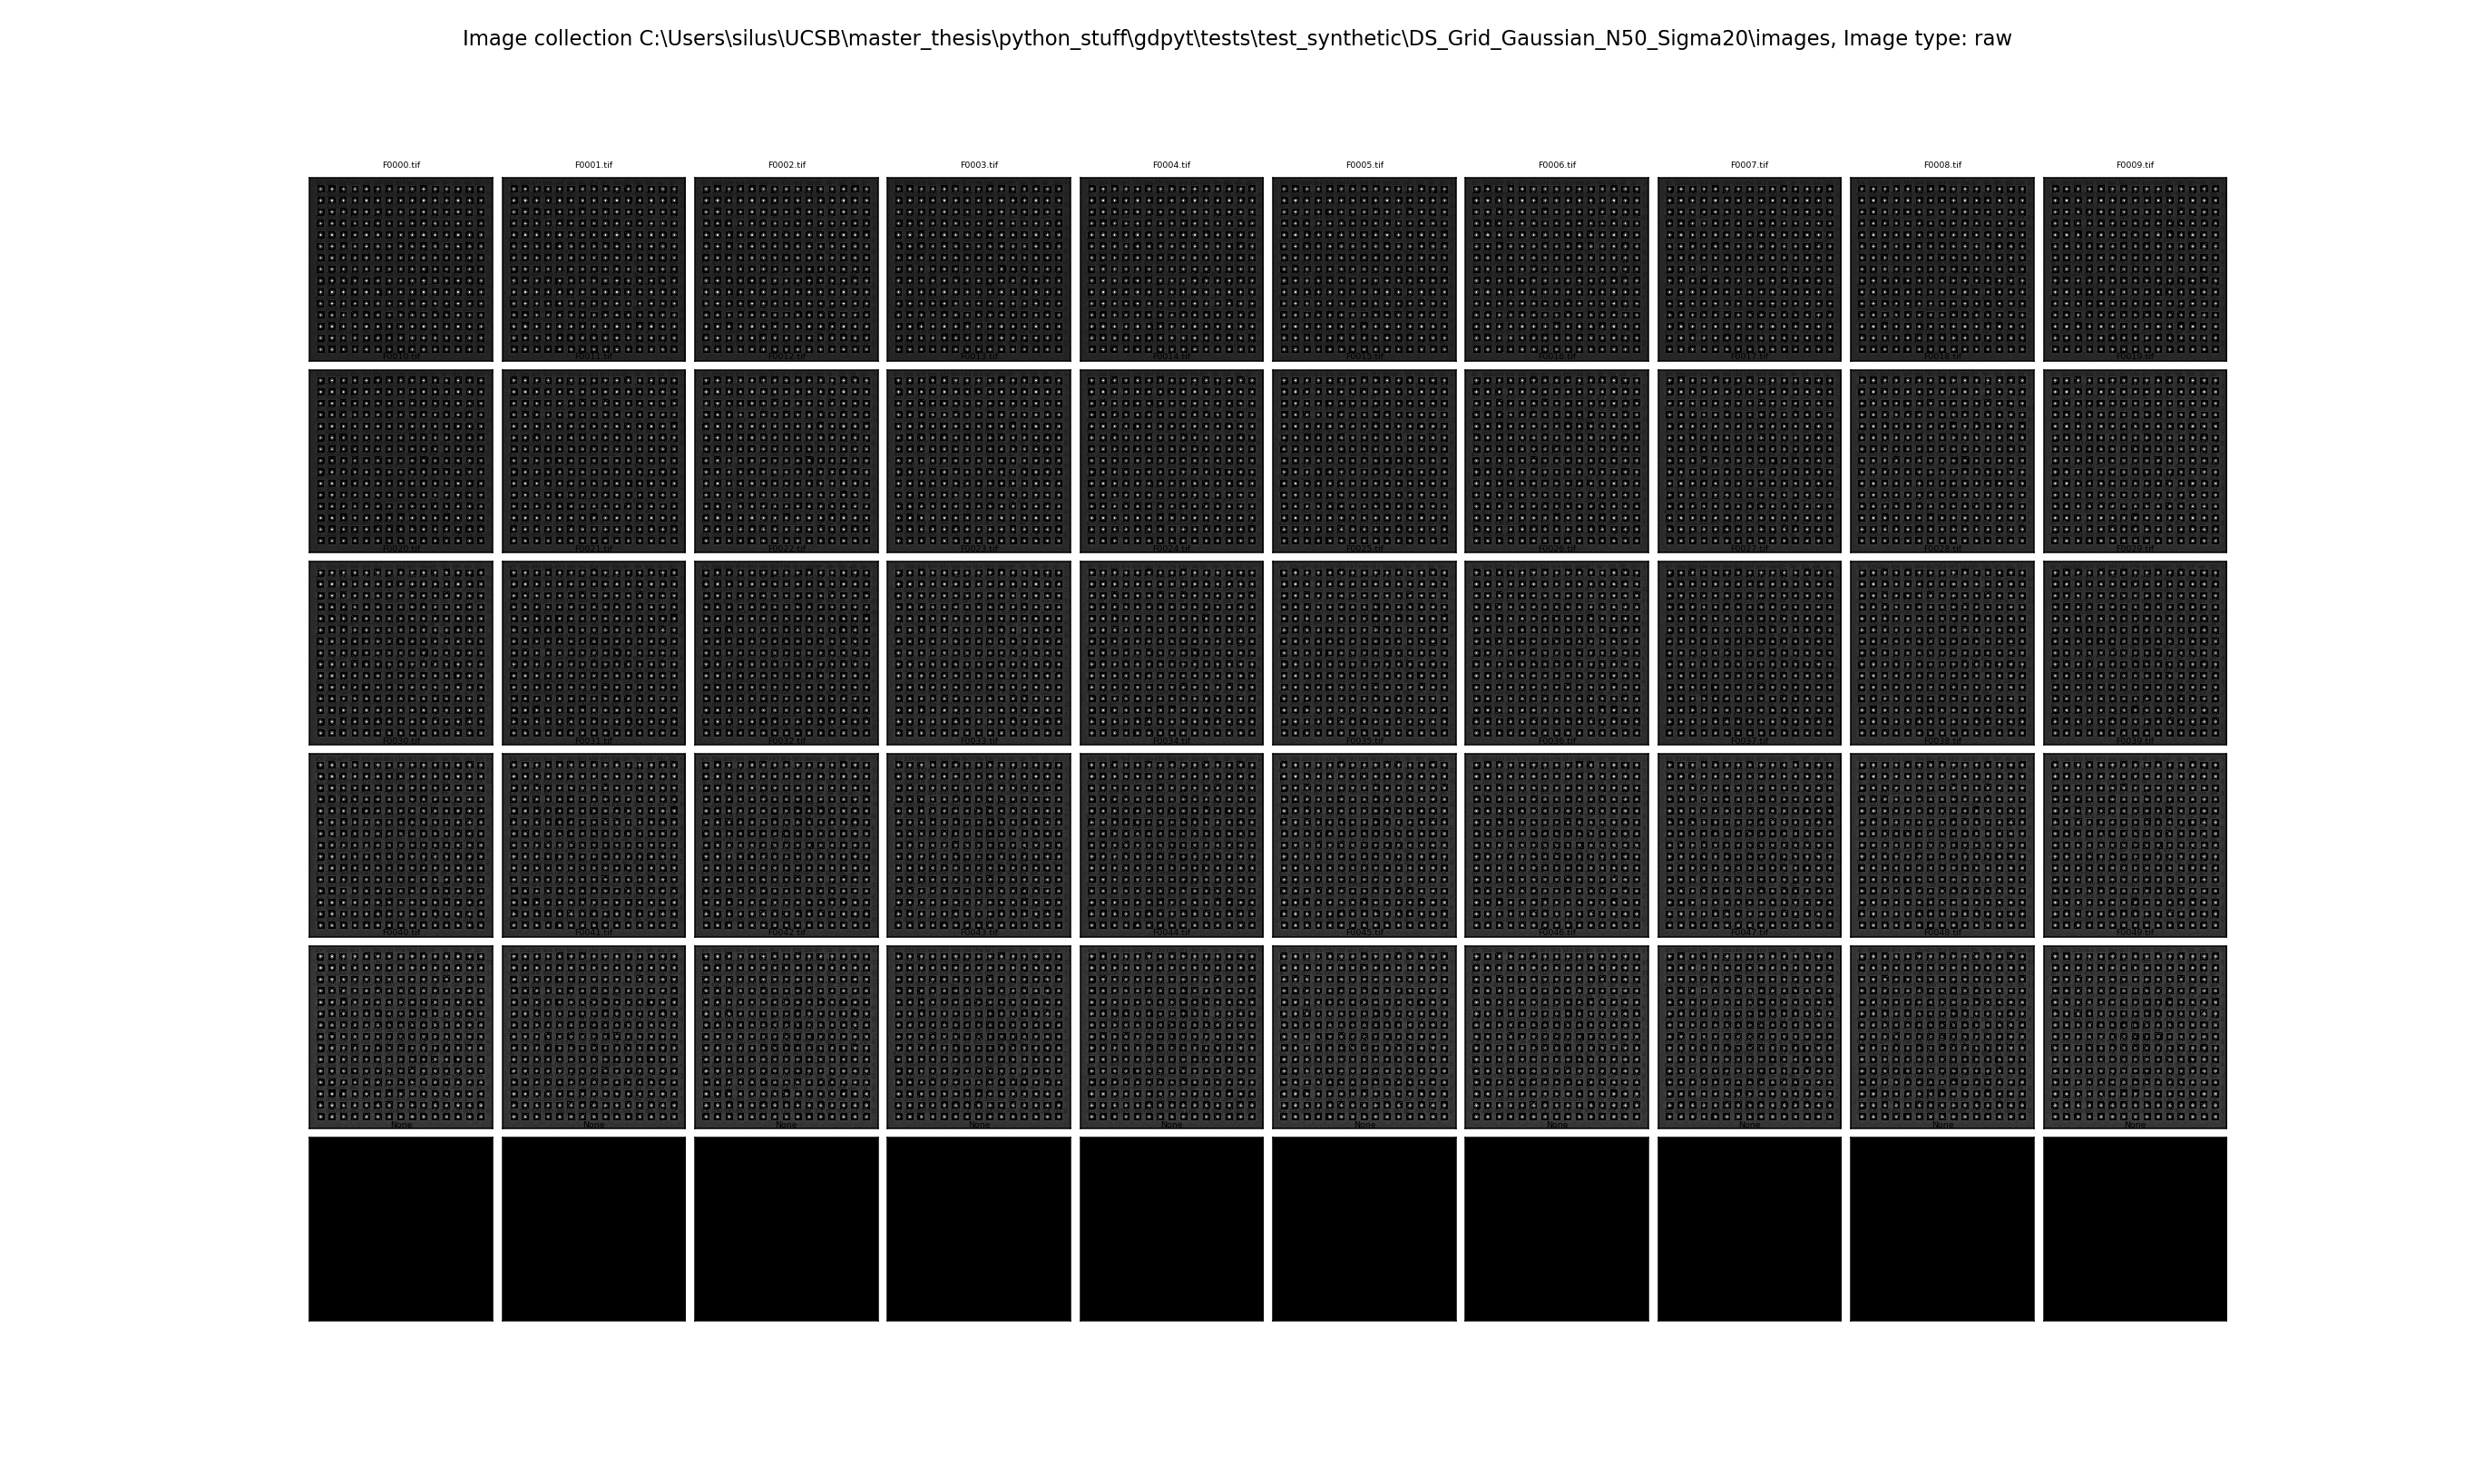

In [5]:
fig = collection.plot(raw=True, draw_particles=True)
fig.show()

## Evaluate performance

In [6]:
# Evaluate performance #############################################################################################
perf_eval = GdpytPerformanceEvaluation(collection, testtxt_folder)
perf_eval.sigma_z()

2.2475547127947415

In [7]:
perf_eval.sigma_z_local()

,z,sigma_z_local
0,0.000000,2.048004
0,1.289474,1.715365
0,2.578947,1.491642
0,3.868421,1.571023
0,5.157895,1.735011
0,6.447368,1.883941
0,7.736842,2.118966
0,9.026316,2.757737
0,10.315789,3.152213
0,11.605263,3.310741


<IPython.core.display.Javascript object>


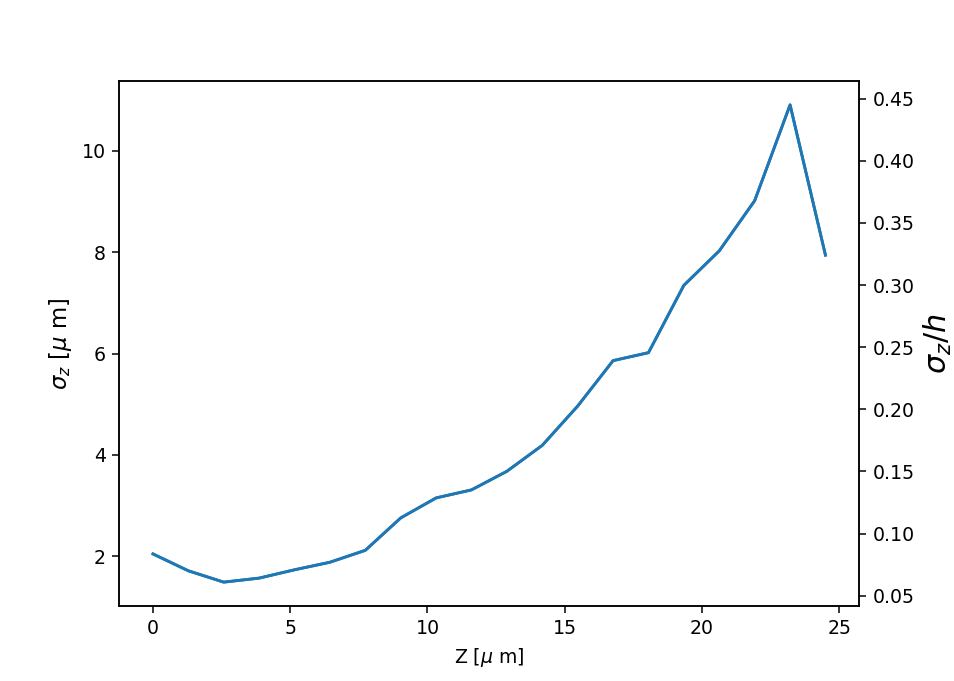

Text(0, 0.5, '$\\sigma_z / h$')

In [8]:
sz_loc = perf_eval.sigma_z_local()
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(sz_loc['z'], sz_loc['sigma_z_local'])
ax.set_ylabel(r'$\sigma_z$ [$\mu$ m]', fontsize=12)
ax.set_xlabel('Z [$\mu$ m]')
ax2 = ax.twinx()
ax2.plot(sz_loc['z'], sz_loc['sigma_z_local'] / (abs(sz_loc['z'].max()) + abs(sz_loc['z'].min())))
ax2.set_ylabel(r'$\sigma_z / h$', fontsize=16)


<IPython.core.display.Javascript object>


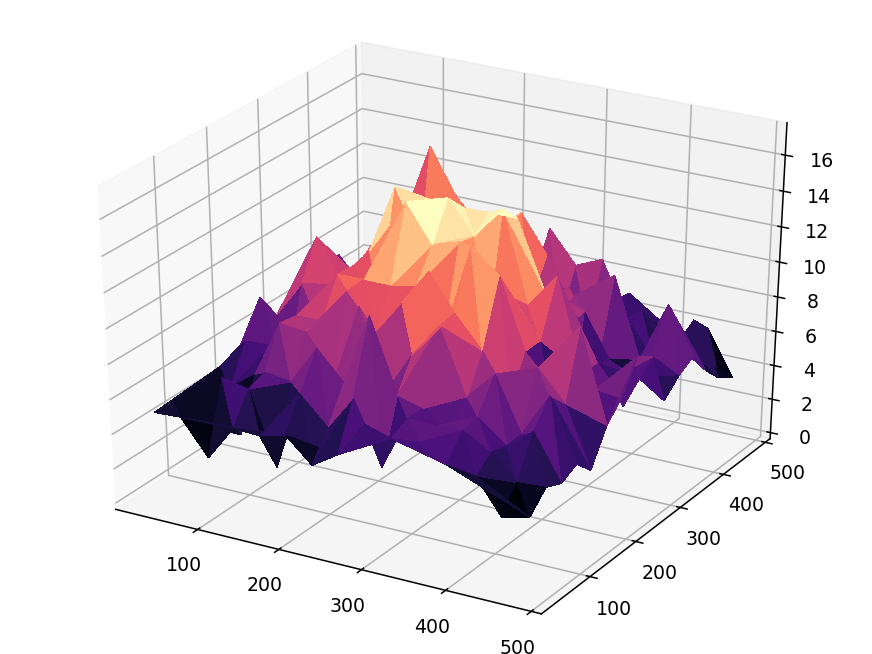

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


<IPython.core.display.Javascript object>


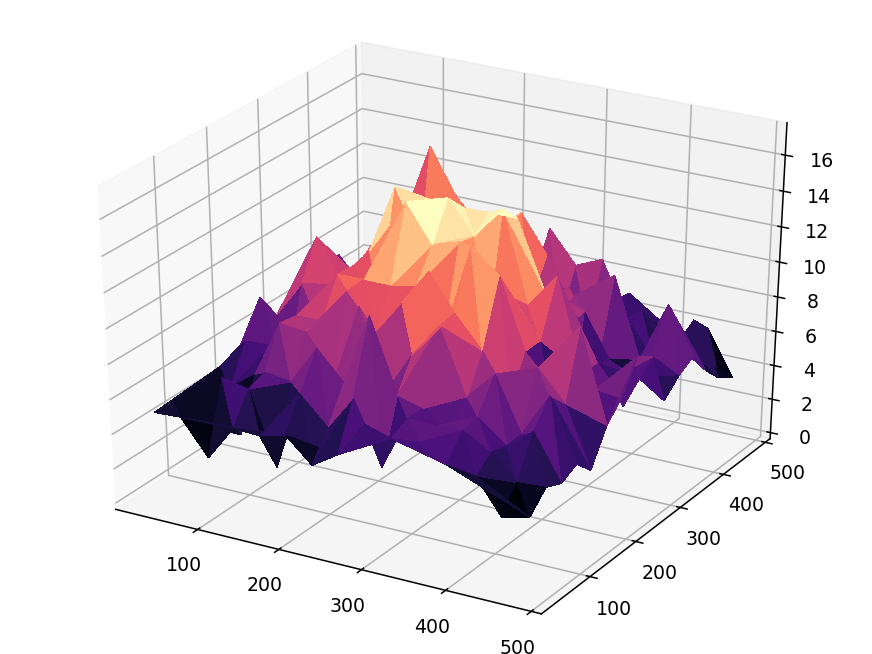

In [9]:
sort_imgs = lambda x: int(x.split('.')[0][1:])
collection.plot_animated_surface(sort_images=sort_imgs, fps=20, save_as='testanim_corr.gif')

In [13]:
collection[40].particles[140].similarity_curve

,z,S_ZNCCORR
0,0.000000,0.856214
1,1.025641,0.863950
2,2.051282,0.877909
3,3.076923,0.891213
4,4.102564,0.904780
5,5.128205,0.912791
6,6.153846,0.920043
7,7.179487,0.925193
8,8.205128,0.929925
9,9.230769,0.931963
